# 다중 회귀 
* 여러 개의 특성을 사용한 선형 회귀를 다중 회귀(multiple regression)이라고 부릅니다. 
* 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선입니다. 
* 2개의 특성을 사용하면 무엇을 학습할까요? 특성이 2개면 선형 회귀는 평면을 학습합니다. 

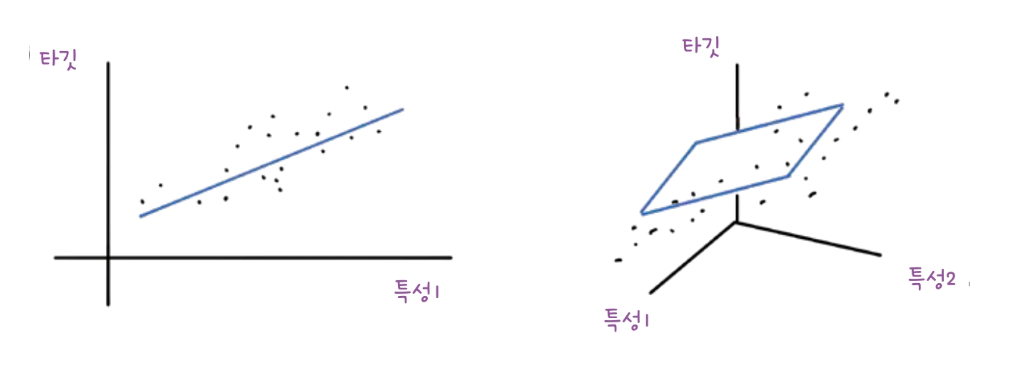

# 특성 공학과 규제

* 각 특성을 서로 곱해서 또 다른 특성을 만들겠습니다. 즉 농어 길이 x 농어 높이를 새로운 특성으로 만듭니다. 
* 이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성공학(feature engineering)이라고 부릅니다. 

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import pandas as pd

* to_numpy() 메서드를 사용하면 넘파일 배열로 변경할 수 있습니다.

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기
* 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공합니다. 사이킷런에서는 이런 클래스를 변환기(transformer)라고 부릅니다. 

In [6]:
from sklearn.preprocessing import PolynomialFeatures

* fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드를 실제로 데이터를 변환합니다. 
* 변환기는 입력 데이터를 변환하는 데 타깃 데이터가 필요하지 않습니다. 따라서 모델 클래스와는 다르게 fit() 메서드에 입력 데이터만 전달합니다. 
* 즉 여기에서는 2개의 특성을 가진 샘플 [2, 3]이 6개의 특성을 가진 샘플 [1, 2, 3, 4, 6, 9]로 바뀌었습니다.

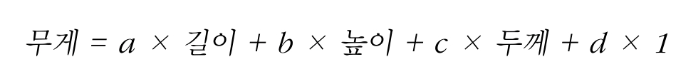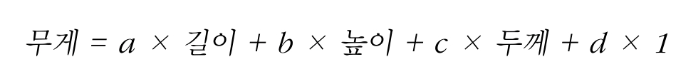

* 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있습니다. 이렇게 놓고보면 특성은 (길이, 높이, 두께, 1)이 됩니다. 
* 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없기 때문에 include_bias = False로 지정하면 없어진다. 

In [7]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [10]:
print(train_poly.shape)

(42, 9)


* get_feature_names() 메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려 줍니다. 

In [11]:
poly.get_feature_names()

C:\Users\gen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [14]:
print(lr.score(test_poly, test_target))

0.9714559911594155


* 특성을 더 많이 추가해보겠습니다. 

In [18]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [19]:
print(train_poly.shape)

(42, 55)


In [20]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [21]:
print(lr.score(test_poly, test_target))

-144.40744532797535


* 특성의 개수를 크게 늘리면 선형 모델은 아주 강력해집니다. 훈련 세트에 대해 거의 완벽하게 학습할 수 있습니다. 하지만 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만듭니다. 

## 규제
* 규제(regularization)는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말합니다. 
* 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것입니다. 
* 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일입니다.

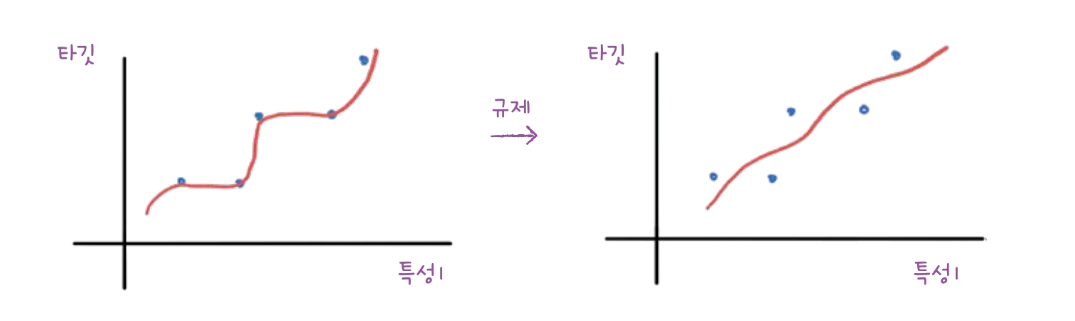

* 왼쪽은 훈련 세트를 과도하게 학습했고 오른쪽은 기울기를 줄여 보다 보편적인 패턴을 학습하고 있습니다. 

* 규제를 적용하기 전에 먼저 정규화를 진행합니다. 평균과 표준편차를 직접 구해 특성을 표준점수로 변환합니다. 
* 사이킷럿에서 제공하는 StandardScaler 클래스를 사용하겠습니다. 

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지와 라쏘 
* 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부릅니다. 
* 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절대값을 기준으로 규제를 적용합니다. 
* 일반적으로 릿지를 조금 더 선호합니다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있습니다. 

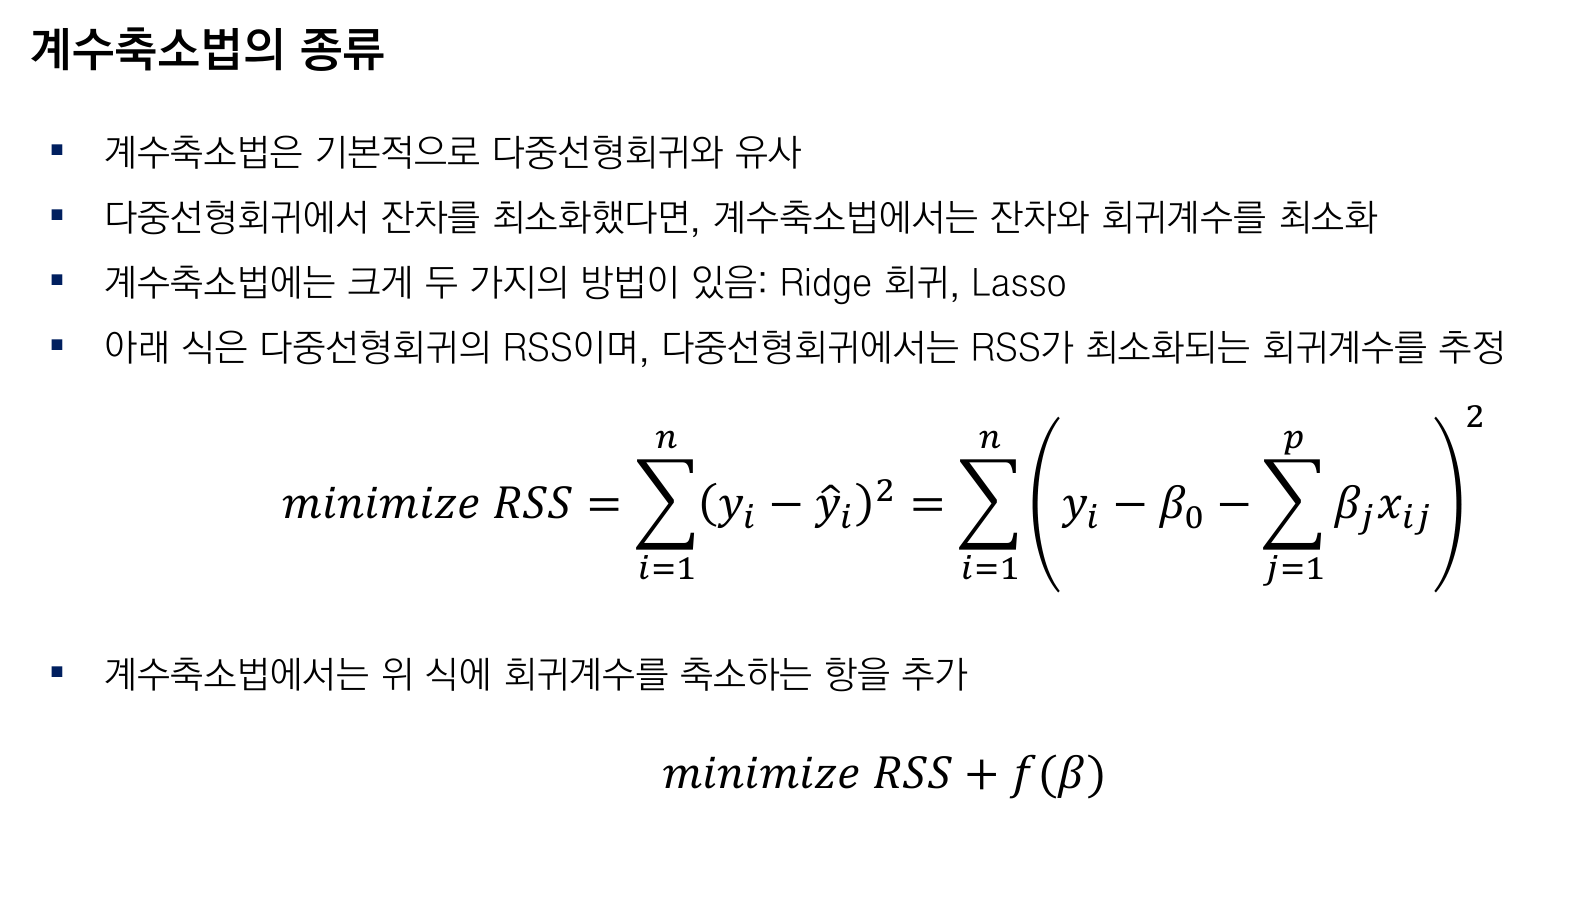

## 릿지

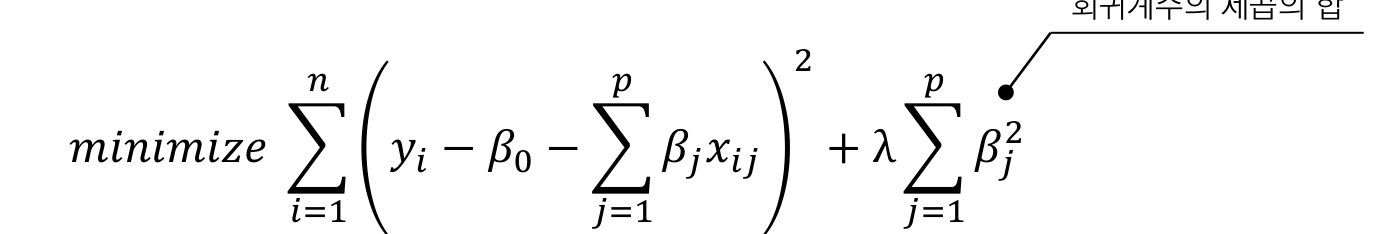

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [24]:
print(ridge.score(test_scaled, test_target))

0.979069397761539


In [34]:
import warnings
warnings.filterwarnings(action='ignore')

In [35]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [36]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

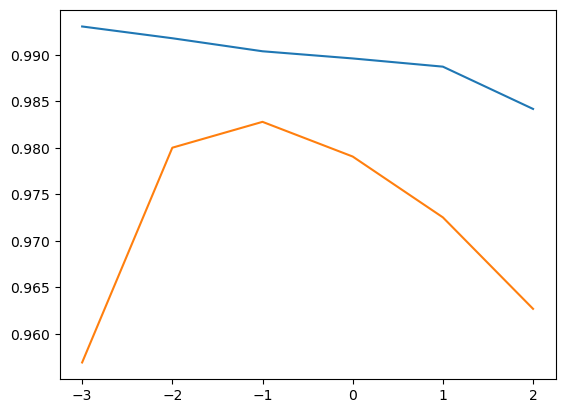

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [38]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570369
0.9827976465386932


## 라쏘

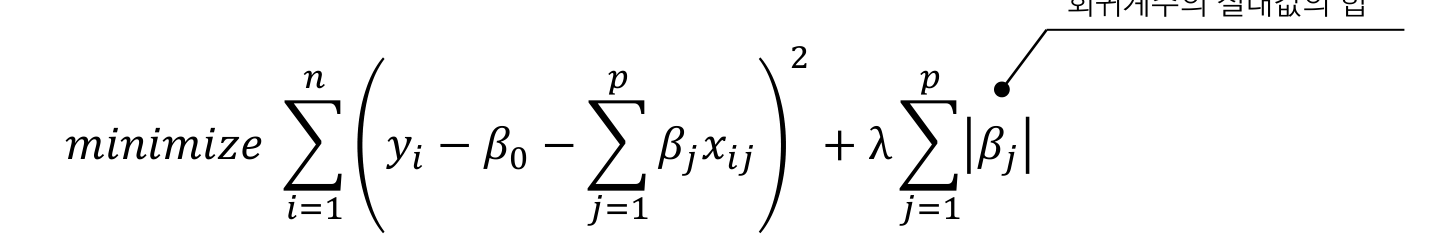

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [40]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [41]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

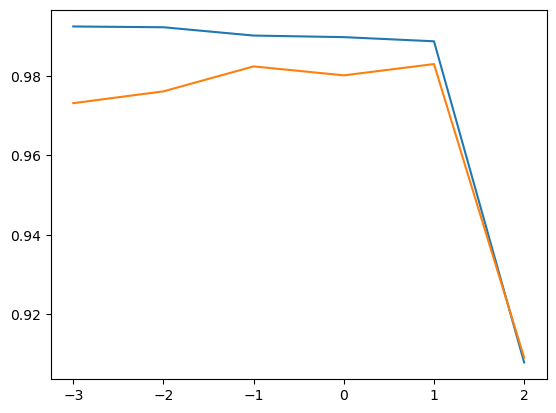

In [42]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [43]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [44]:
print(np.sum(lasso.coef_ == 0))

40
